In [7]:
%matplotlib widget


RuntimeError: 'widget' is not a recognised GUI loop or backend name

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation as R

# --------------------------------------------------
# 1. Load IMU trajectory (positions already integrated)
# --------------------------------------------------
imu = pd.read_csv("aligned_photo_imu.csv")

# Expected columns: filename, timestamp, pos_x, pos_y, pos_z
# If your CSV uses different names, update them here:
#imu_positions = imu[['pos_x', 'pos_y', 'pos_z']].values

imu.head(2)

,photo,photo_time,imu_time,imu_time_diff_s,seconds_elapsed,gyroscope_z,gyroscope_y,gyroscope_x,gyroscope_local_time,gravity_z,...,orientation_pitch,orientation_local_time,accelerometerUncalibrated_z,accelerometerUncalibrated_y,accelerometerUncalibrated_x,accelerometerUncalibrated_local_time,accelerometer_z,accelerometer_y,accelerometer_x,accelerometer_local_time
0,IMG_2837.JPG,2025-10-15 16:37:00,2025-10-15 16:37:00.135,0.135,15.0,0.053253,-0.019258,-0.004439,2025-10-15T16:37:00.135-07:00,-9.762937,...,-0.066032,2025-10-15T16:37:00.135-07:00,-0.987431,0.066210,-0.063365,2025-10-15T16:37:00.129-07:00,0.081532,0.001777,0.040302,2025-10-15T16:37:00.135-07:00
1,IMG_2838.JPG,2025-10-15 16:37:06,2025-10-15 16:37:06.133,0.133,21.0,-0.000501,-0.004474,-0.000432,2025-10-15T16:37:06.133-07:00,-9.712264,...,-0.052304,2025-10-15T16:37:06.133-07:00,-0.981831,0.048635,-0.123387,2025-10-15T16:37:06.134-07:00,0.085508,-0.035216,0.046977,2025-10-15T16:37:06.133-07:00


In [2]:
import pandas as pd

imu = pd.read_csv("aligned_photo_imu.csv")
print("Columns:", imu.columns.tolist())
imu.head()


Columns: ['photo', 'photo_time', 'imu_time', 'imu_time_diff_s', 'seconds_elapsed', 'gyroscope_z', 'gyroscope_y', 'gyroscope_x', 'gyroscope_local_time', 'gravity_z', 'gravity_y', 'gravity_x', 'gravity_local_time', 'magnetometerUncalibrated_z', 'magnetometerUncalibrated_y', 'magnetometerUncalibrated_x', 'magnetometerUncalibrated_local_time', 'magnetometer_z', 'magnetometer_y', 'magnetometer_x', 'magnetometer_local_time', 'location_altitude', 'location_speedAccuracy', 'location_bearingAccuracy', 'location_latitude', 'location_altitudeAboveMeanSeaLevel', 'location_bearing', 'location_horizontalAccuracy', 'location_verticalAccuracy', 'location_longitude', 'location_speed', 'location_local_time', 'gyroscopeUncalibrated_z', 'gyroscopeUncalibrated_y', 'gyroscopeUncalibrated_x', 'gyroscopeUncalibrated_local_time', 'orientation_yaw', 'orientation_qx', 'orientation_qz', 'orientation_roll', 'orientation_qw', 'orientation_qy', 'orientation_pitch', 'orientation_local_time', 'accelerometerUncalibrate

,photo,photo_time,imu_time,imu_time_diff_s,seconds_elapsed,gyroscope_z,gyroscope_y,gyroscope_x,gyroscope_local_time,gravity_z,...,orientation_pitch,orientation_local_time,accelerometerUncalibrated_z,accelerometerUncalibrated_y,accelerometerUncalibrated_x,accelerometerUncalibrated_local_time,accelerometer_z,accelerometer_y,accelerometer_x,accelerometer_local_time
0,IMG_2837.JPG,2025-10-15 16:37:00,2025-10-15 16:37:00.135,0.135,15.0,0.053253,-0.019258,-0.004439,2025-10-15T16:37:00.135-07:00,-9.762937,...,-0.066032,2025-10-15T16:37:00.135-07:00,-0.987431,0.066210,-0.063365,2025-10-15T16:37:00.129-07:00,0.081532,0.001777,0.040302,2025-10-15T16:37:00.135-07:00
1,IMG_2838.JPG,2025-10-15 16:37:06,2025-10-15 16:37:06.133,0.133,21.0,-0.000501,-0.004474,-0.000432,2025-10-15T16:37:06.133-07:00,-9.712264,...,-0.052304,2025-10-15T16:37:06.133-07:00,-0.981831,0.048635,-0.123387,2025-10-15T16:37:06.134-07:00,0.085508,-0.035216,0.046977,2025-10-15T16:37:06.133-07:00
2,IMG_2839.JPG,2025-10-15 16:37:10,2025-10-15 16:37:10.130,0.130,25.0,0.054564,-0.014750,-0.010651,2025-10-15T16:37:10.130-07:00,-9.711562,...,-0.061169,2025-10-15T16:37:10.130-07:00,-0.982128,0.059247,-0.118700,2025-10-15T16:37:10.131-07:00,0.074637,-0.013179,0.057894,2025-10-15T16:37:10.130-07:00
3,IMG_2840.JPG,2025-10-15 16:37:14,2025-10-15 16:37:14.136,0.136,29.0,0.002471,0.011096,0.015074,2025-10-15T16:37:14.136-07:00,-9.680090,...,-0.051588,2025-10-15T16:37:14.136-07:00,-0.981021,0.049852,-0.145714,2025-10-15T16:37:14.128-07:00,0.064177,-0.017768,0.057161,2025-10-15T16:37:14.136-07:00
4,IMG_2841.JPG,2025-10-15 16:37:19,2025-10-15 16:37:19.127,0.127,34.0,-0.021598,0.029419,-0.003451,2025-10-15T16:37:19.127-07:00,-9.713937,...,0.004962,2025-10-15T16:37:19.127-07:00,-0.979706,-0.008347,-0.131745,2025-10-15T16:37:19.129-07:00,0.113808,-0.035915,0.052667,2025-10-15T16:37:19.127-07:00


In [3]:
# from scipy.spatial.transform import Rotation as R
# import numpy as np

# def read_colmap_poses(path):
#     poses = []
#     with open(path) as f:
#         for line in f:
#             if line.startswith('#') or len(line.strip()) == 0:
#                 continue
#             parts = line.strip().split()
#             qw,qx,qy,qz = map(float, parts[1:5])
#             tx,ty,tz = map(float, parts[5:8])
#             Rwc = R.from_quat([qx,qy,qz,qw]).as_matrix().T
#             twc = -Rwc @ np.array([tx,ty,tz])
#             poses.append(twc)
#             print(poses)
#             print(len(poses))
#     return np.array(poses)

# colmap_centers = read_colmap_poses(r"C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\images.txt")
from scipy.spatial.transform import Rotation as R
import numpy as np

def read_frames_txt(path):
    """
    Parses the COLMAP frames.txt format and returns:
      - Nx3 camera centers in world coordinates
      - Nx4 quaternions (QW,QX,QY,QZ)
    """
    centers = []
    quaternions = []

    with open(path, 'r') as f:
        for line in f:
            if line.startswith('#') or len(line.strip()) == 0:
                continue  # skip comments and empty lines

            parts = line.strip().split()

            # Extract quaternion and translation (known positions in line)
            qw, qx, qy, qz = map(float, parts[2:6])
            tx, ty, tz = map(float, parts[6:9])

            # Convert quaternion -> rotation matrix
            Rcw = R.from_quat([qx, qy, qz, qw]).as_matrix()

            # Compute camera center in world coordinates
            C = -Rcw.T @ np.array([tx, ty, tz])

            centers.append(C)
            quaternions.append([qw, qx, qy, qz])

    return np.array(centers), np.array(quaternions)



In [4]:
colmap_centers, quats = read_frames_txt(r"C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\frames.txt")
print("Parsed frames:", len(colmap_centers))
print("First 3 centers:\n", colmap_centers[:3])
print("Range of coordinates:", np.ptp(colmap_centers, axis=0))


Parsed frames: 30
First 3 centers:
 [[-2.60669574 -0.74058338  1.24541074]
 [-2.59320275  0.91237592  0.37232815]
 [-1.49987847  0.46995861  0.05484122]]
Range of coordinates: [ 8.56901682  9.07150447 10.93963674]


In [19]:
import pandas as pd
import numpy as np

imu = pd.read_csv("aligned_photo_imu.csv")

# --- convert timestamp strings to elapsed seconds ---
imu["imu_time"] = pd.to_datetime(imu["imu_time"])
ts = (imu["imu_time"] - imu["imu_time"].iloc[0]).dt.total_seconds().values

# --- gravity-corrected acceleration ---
accel = imu[["accelerometer_x","accelerometer_y","accelerometer_z"]].values
gvec  = imu[["gravity_x","gravity_y","gravity_z"]].values
acc_lin = (accel - gvec)#* 9.81  #* 9.81  

# --- integrate acceleration twice ---
dt = np.mean(np.diff(ts))
vel = np.cumsum(acc_lin * dt, axis=0)
pos = np.cumsum(vel * dt, axis=0)
# normalise IMU trajectory to unit range
pos -= pos.mean(axis=0)                # centre at origin
#scale_norm = np.ptp(pos, axis=0).max() # largest range
#pos /= scale_norm                      # now range ≈ 1.0


print("Δt mean:", dt, "seconds")
print("IMU positions shape:", pos.shape)
print("First few positions:\n", pos[:5])


Δt mean: 5.965241379310345 seconds
IMU positions shape: (30, 3)
First few positions:
 [[-0.02317873  0.03464027 -0.35382543]
 [-0.02273669  0.03437681 -0.34948837]
 [-0.02201213  0.03397806 -0.34299051]
 [-0.02094702  0.03346375 -0.33434108]
 [-0.01957447  0.03295224 -0.32352167]]


In [20]:
pos[::]


array([[-2.31787280e-02,  3.46402718e-02, -3.53825425e-01],
       [-2.27366938e-02,  3.43768072e-02, -3.49488373e-01],
       [-2.20121266e-02,  3.39780649e-02, -3.42990506e-01],
       [-2.09470249e-02,  3.34637451e-02, -3.34341083e-01],
       [-1.95744741e-02,  3.29522393e-02, -3.23521670e-01],
       [-1.78975548e-02,  3.22563882e-02, -3.10540779e-01],
       [-1.59520026e-02,  3.12807028e-02, -2.95408769e-01],
       [-1.36974776e-02,  2.99021342e-02, -2.78152360e-01],
       [-1.10983667e-02,  2.77149623e-02, -2.58895661e-01],
       [-8.70590845e-03,  2.53369743e-02, -2.37461875e-01],
       [-6.52142873e-03,  2.26929884e-02, -2.13866358e-01],
       [-4.54106860e-03,  1.97601965e-02, -1.88107581e-01],
       [-2.70186097e-03,  1.64655208e-02, -1.60241962e-01],
       [-1.07797863e-03,  1.29318165e-02, -1.30209671e-01],
       [ 5.24607316e-04,  9.13650057e-03, -9.79979547e-02],
       [ 2.04426964e-03,  5.12054330e-03, -6.36023926e-02],
       [ 3.55303294e-03,  1.02623521e-03

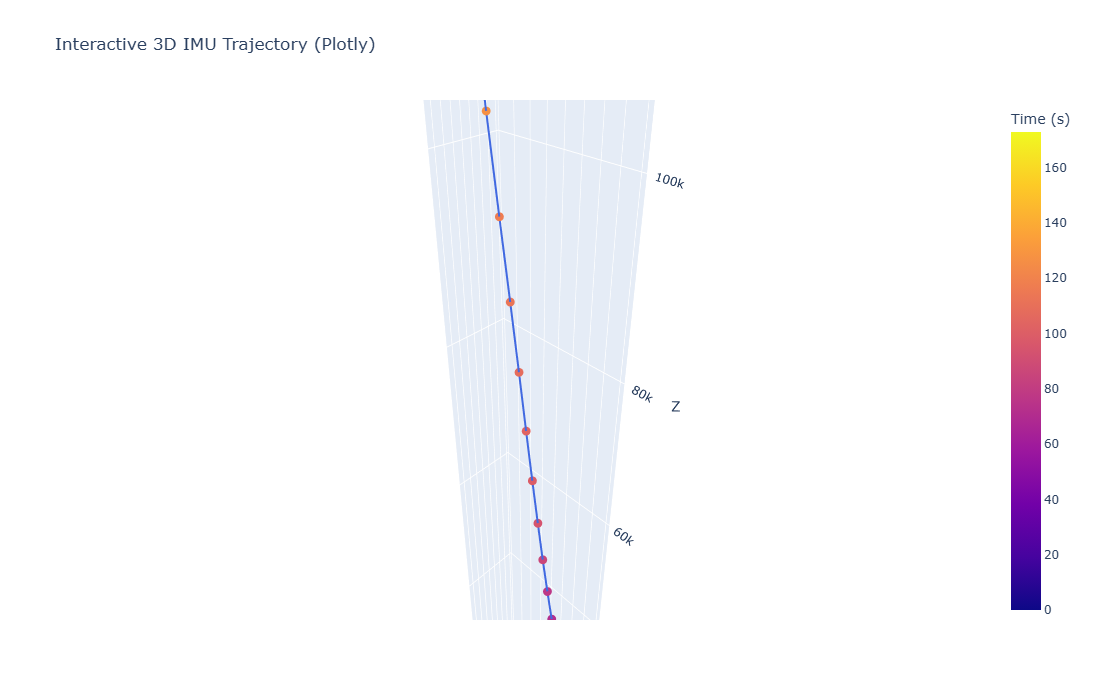

In [8]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

imu = pd.read_csv("aligned_photo_imu.csv")
imu["imu_time"] = pd.to_datetime(imu["imu_time"])
time_s = (imu["imu_time"] - imu["imu_time"].iloc[0]).dt.total_seconds().values

accel = imu[["accelerometer_x","accelerometer_y","accelerometer_z"]].values
gvec  = imu[["gravity_x","gravity_y","gravity_z"]].values
acc_lin = accel - gvec
dt = np.mean(np.diff(time_s))
vel = np.cumsum(acc_lin * dt, axis=0)
pos = np.cumsum(vel * dt, axis=0)
pos -= pos[0]

fig = go.Figure(data=[go.Scatter3d(
    x=pos[:,0], y=pos[:,1], z=pos[:,2],
    mode='lines+markers',
    marker=dict(
        size=5,
        color=time_s,
        colorscale='Plasma',
        colorbar=dict(title='Time (s)')
    ),
    line=dict(width=4, color='royalblue')
)])
fig.update_layout(
    title="Interactive 3D IMU Trajectory (Plotly)",
    scene=dict(
        xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
        aspectmode='data'
    ),
    width=900, height=700
)
fig.show()


In [21]:
imu_names = imu["photo"].tolist()
imu_names

['IMG_2837.JPG',
 'IMG_2838.JPG',
 'IMG_2839.JPG',
 'IMG_2840.JPG',
 'IMG_2841.JPG',
 'IMG_2842.JPG',
 'IMG_2843.JPG',
 'IMG_2844.JPG',
 'IMG_2845.JPG',
 'IMG_2846.JPG',
 'IMG_2847.JPG',
 'IMG_2848.JPG',
 'IMG_2849.JPG',
 'IMG_2850.JPG',
 'IMG_2851.JPG',
 'IMG_2852.JPG',
 'IMG_2853.JPG',
 'IMG_2854.JPG',
 'IMG_2855.JPG',
 'IMG_2856.JPG',
 'IMG_2857.JPG',
 'IMG_2858.JPG',
 'IMG_2859.JPG',
 'IMG_2860.JPG',
 'IMG_2861.JPG',
 'IMG_2862.JPG',
 'IMG_2863.JPG',
 'IMG_2864.JPG',
 'IMG_2865.JPG',
 'IMG_2866.JPG']

In [22]:
# # assuming each 'photo' in IMU CSV exists in COLMAP image list
# colmap_names = []
# with open(r"C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\images.txt") as f:
#     for line in f:
#         if line.startswith('#'): continue
#         parts = line.strip().split()
#         if len(parts) > 9:
#             colmap_names.append(parts[9])

# # order COLMAP centers to match IMU file
# order = [name for name in imu_names if name in colmap_names]
# colmap_ordered = np.array([colmap_centers[colmap_names.index(n)] for n in order])

# # truncate IMU positions to same length
# imu_positions = pos[:len(colmap_ordered)]
# print("Matched", len(imu_positions), "frames")
# imu_positions
# --- Read image names from COLMAP (pose lines only) ---
colmap_names = []
with open(r"C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\images.txt") as f:
    lines = [l.strip() for l in f if len(l.strip()) > 0 and not l.startswith('#')]
    for i in range(0, len(lines), 2):  # every 2 lines, first line is pose info
        parts = lines[i].split()
        if len(parts) > 9:
            colmap_names.append(parts[9])

print("Total COLMAP pose names:", len(colmap_names))
print("Total IMU photo names:", len(imu_names))

# --- Match only overlapping image names ---
common_names = [n for n in imu_names if n in colmap_names]
print("Common frames:", len(common_names))

# --- Reorder COLMAP centers to match IMU order ---
colmap_ordered = np.array([colmap_centers[colmap_names.index(n)] for n in common_names])

# --- Trim IMU positions to same number of matched frames ---
imu_positions = pos[:len(colmap_ordered)]
print("✅ Matched", len(imu_positions), "frames successfully.")


Total COLMAP pose names: 30
Total IMU photo names: 30
Common frames: 30
✅ Matched 30 frames successfully.


In [23]:
print(colmap_ordered.shape, imu_positions.shape)


(30, 3) (30, 3)


In [24]:
def estimate_similarity_transform(A, B):
    """
    Estimate s, R, t that maps A -> B.
    A, B: Nx3 arrays (A = COLMAP, B = IMU)
    """
    mu_A, mu_B = A.mean(0), B.mean(0)
    A_c, B_c = A - mu_A, B - mu_B
    H = A_c.T @ B_c / len(A)
    U, S, Vt = np.linalg.svd(H)
    R_est = Vt.T @ U.T
    if np.linalg.det(R_est) < 0:
        Vt[-1, :] *= -1
        R_est = Vt.T @ U.T
    scale = np.trace(np.diag(S)) / np.sum(A_c**2)
    t_est = mu_B - scale * R_est @ mu_A
    return scale, R_est, t_est

scale, R_align, t_align = estimate_similarity_transform(colmap_ordered, imu_positions)
print("Scale:", scale)
print("Rotation:\n", R_align)
print("Translation:", t_align)


Scale: 0.00032384377765943417
Rotation:
 [[ 0.1088737  -0.3120128  -0.94381912]
 [ 0.80422094 -0.53041614  0.26811825]
 [-0.58427322 -0.78823013  0.19317886]]
Translation: [-1.09678199e-04  1.48376085e-06  4.37406039e-05]


In [25]:
# import open3d as o3d

# pcd = o3d.io.read_point_cloud(r"C:\Users\vdeo3\Documents\Camera Scripts Python\colmap_project\dense -mesh.ply")
# points = np.asarray(pcd.points)
# true_scale = 1.0 / scale   
# points_metric = true_scale * (R_align @ points.T).T + t_align
# pcd.points = o3d.utility.Vector3dVector(points_metric)
# save_path = r"C:\Users\vdeo3\Documents\Camera Scripts Python\colmap_project\mesh_metric.ply"
# o3d.io.write_point_cloud(save_path, pcd)
# print("✅ Saved metric point cloud →", save_path)



In [26]:
# import open3d as o3d
# import numpy as np

# # --- Load the scaled point cloud or mesh ---
# pcd = o3d.io.read_point_cloud(r"C:\Users\vdeo3\Documents\Camera Scripts Python\colmap_project\mesh_metric.ply")

# # --- Compute axis-aligned bounding box (AABB) ---
# aabb = pcd.get_axis_aligned_bounding_box()
# min_bound = aabb.get_min_bound()
# max_bound = aabb.get_max_bound()

# # --- Compute dimensions ---
# dimensions = max_bound - min_bound  # X, Y, Z extents in meters

# print("📏 Object bounding box:")
# print(f"  X-width: {dimensions[0]:.4f} m  ({dimensions[0]*100:.1f} cm)")
# print(f"  Y-depth: {dimensions[1]:.4f} m  ({dimensions[1]*100:.1f} cm)")
# print(f"  Z-height: {dimensions[2]:.4f} m  ({dimensions[2]*100:.1f} cm)")

# # --- Optional: visualize bounding box ---
# aabb.color = (1, 0, 0)  # red box
# o3d.visualization.draw_geometries([pcd, aabb])


In [27]:
# print("Estimated scale:", scale)


In [28]:
import os, subprocess
import numpy as np
from scipy.spatial.transform import Rotation

# -------------------------------------------------------------------
# ✅ Paths (edit these if needed)
# -------------------------------------------------------------------
input_mesh = r"C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\dense -mesh.ply"
output_mesh = r"C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\mesh_metric.ply"
blender_exe = r"C:\Program Files\Blender Foundation\Blender 4.5\blender.exe"
blender_script = r"C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\apply_blender_transform.py"

# -------------------------------------------------------------------
# ✅ Variables from your alignment code
# -------------------------------------------------------------------
# scale, R_align, t_align must already exist from previous cells

# -------------------------------------------------------------------
# ✅ Step 1: Write Blender helper script (UTF-8 safe)
# -------------------------------------------------------------------
if not os.path.exists(blender_script):
    blender_code = r"""
import bpy
import sys
import mathutils

# -------------------------------------------------------
# Parse args
# -------------------------------------------------------
args = sys.argv
input_path = args[-7]
output_path = args[-6]
scale_factor = float(args[-5])
rx, ry, rz = map(float, args[-4:-1])
tx, ty, tz = map(float, args[-3:])

print("Input:", input_path)
print("Output:", output_path)
print("Scale:", scale_factor)
print("Rotation (radians):", (rx, ry, rz))
print("Translation:", (tx, ty, tz))

# -------------------------------------------------------
# Import mesh
# -------------------------------------------------------
bpy.ops.import_mesh.ply(filepath=input_path)
obj = bpy.context.selected_objects[0]
mesh = obj.data

# -------------------------------------------------------
# Build full transformation matrix:  M = T * R * S
# -------------------------------------------------------
rot = mathutils.Euler((rx, ry, rz), 'XYZ').to_matrix().to_4x4()
trans = mathutils.Matrix.Translation((tx, ty, tz))
scale_mat = mathutils.Matrix.Scale(scale_factor, 4)
M = trans @ rot @ scale_mat

# -------------------------------------------------------
# Apply transform to every vertex (IMU = s R COLMAP + t)
# -------------------------------------------------------
for v in mesh.vertices:
    v.co = M @ v.co

# -------------------------------------------------------
# Reset object transform to identity and export
# -------------------------------------------------------
obj.matrix_world = mathutils.Matrix.Identity(4)
bpy.ops.export_mesh.ply(filepath=output_path)

# -------------------------------------------------------
# Sanity check: print final bounding box in meters
# -------------------------------------------------------
verts = [v.co for v in mesh.vertices]
min_v = mathutils.Vector((min(v.x for v in verts),
                          min(v.y for v in verts),
                          min(v.z for v in verts)))
max_v = mathutils.Vector((max(v.x for v in verts),
                          max(v.y for v in verts),
                          max(v.z for v in verts)))
size = max_v - min_v
print(f"✅ Saved metric mesh to: {output_path}")
print(f"Object bounding box (meters): X={size.x:.4f}, Y={size.y:.4f}, Z={size.z:.4f}")
"""
    with open(blender_script, "w", encoding="utf-8") as f:
        f.write(blender_code)
    print("✅ Blender helper script created at:", blender_script)
else:
    print("ℹ️ Using existing Blender script →", blender_script)

# -------------------------------------------------------------------
# ✅ Step 2: Convert rotation matrix to Euler angles for Blender
# -------------------------------------------------------------------
r_euler = Rotation.from_matrix(R_align).as_euler('xyz', degrees=False)

# -------------------------------------------------------------------
# ✅ Step 3: Run Blender in background mode
# -------------------------------------------------------------------
cmd = [
    blender_exe, "--background",
    "--python", blender_script, "--",
    input_mesh, output_mesh,
    str(scale),  # use scale directly (COLMAP → IMU)
    str(r_euler[0]), str(r_euler[1]), str(r_euler[2]),
    str(t_align[0]), str(t_align[1]), str(t_align[2])
]

print("🚀 Launching Blender 4.5.3 LTS for scaling and alignment...")
subprocess.run(cmd)
print("🎉 Done! Metric mesh exported to:", output_mesh)


ℹ️ Using existing Blender script → C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\apply_blender_transform.py
🚀 Launching Blender 4.5.3 LTS for scaling and alignment...
🎉 Done! Metric mesh exported to: C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\mesh_metric.ply


In [29]:
print("scale =", scale)
print("1/scale =", 1/scale)
print("Expected object width in meters:", 55e-3)
print("Scaled width (m):", 55e-3 * (1/scale))


scale = 0.00032384377765943417
1/scale = 3087.9086429495524
Expected object width in meters: 0.055
Scaled width (m): 169.83497536222538


In [30]:
import open3d as o3d
import numpy as np

mesh = o3d.io.read_triangle_mesh(input_mesh)
points = np.asarray(mesh.vertices)

# Apply transform in Python to verify scale numerically
points_metric = scale * (R_align @ points.T).T + t_align
bbox = np.ptp(points_metric, axis=0)
print("Predicted bounding box (m):", bbox)
print("Width (mm):", bbox[0]*1000)


Predicted bounding box (m): [0.00183874 0.00642134 0.0040332 ]
Width (mm): 1.8387390986542331


In [31]:
fixed_scale = scale / 1000.0
points_metric = fixed_scale * (R_align @ points.T).T + t_align
bbox = np.ptp(points_metric, axis=0)
print("Fixed bounding box (m):", bbox)
print("Width (mm):", bbox[0]*1000)


Fixed bounding box (m): [1.83873910e-06 6.42133612e-06 4.03319924e-06]
Width (mm): 0.0018387390986542322


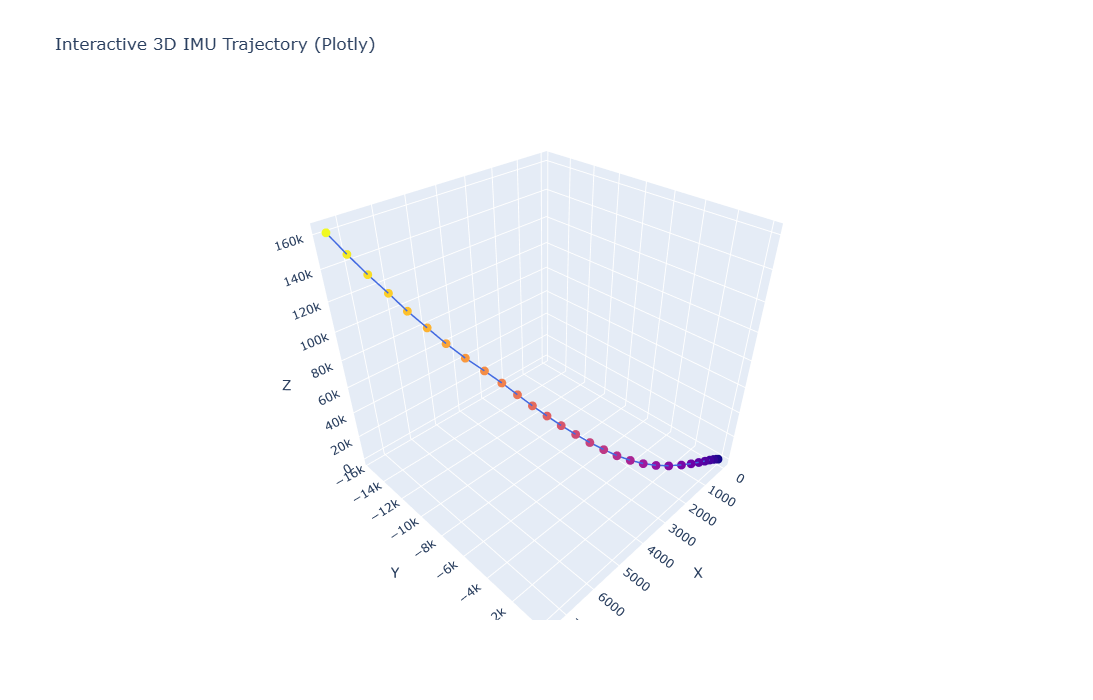

In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=pos[:,0], y=pos[:,1], z=pos[:,2],
    mode='lines+markers',
    marker=dict(size=5, color=np.arange(len(pos)), colorscale='Plasma'),
    line=dict(width=3, color='royalblue')
)])
fig.update_layout(
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    width=900, height=700,
    title="Interactive 3D IMU Trajectory (Plotly)"
)
fig.show()


Alignment scale: 159.06505823105812


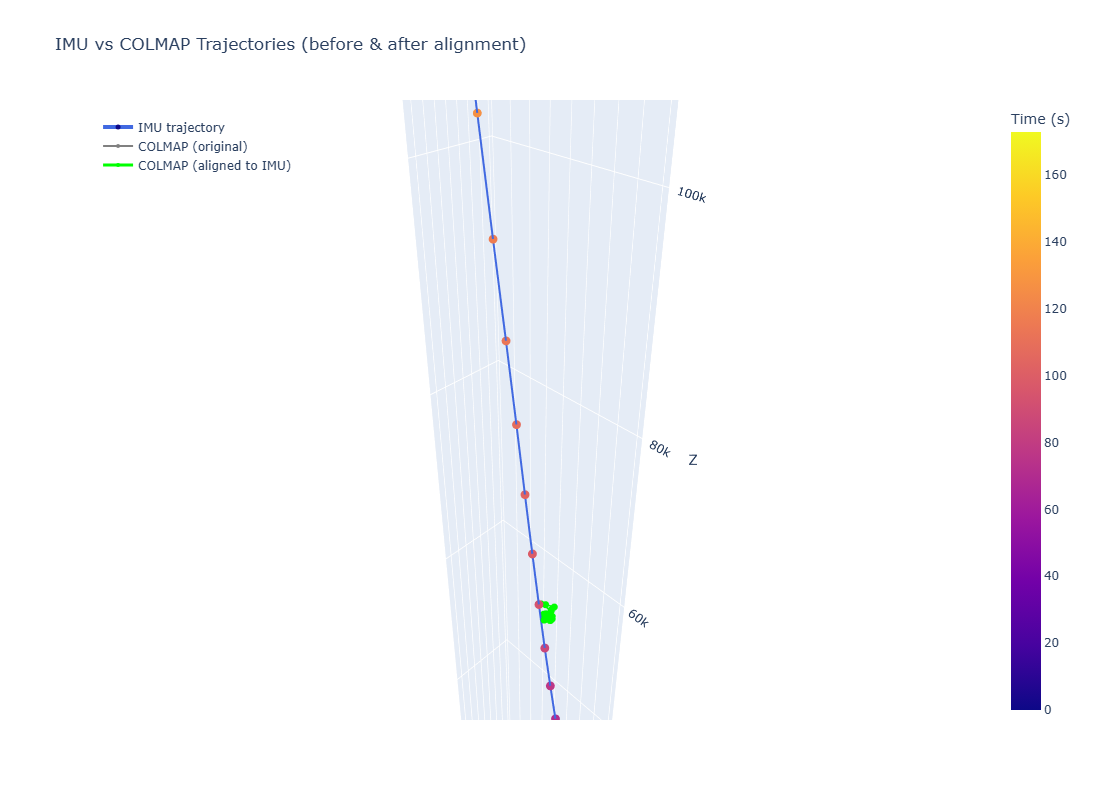

In [12]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation as R

# ----------------------------------------------------
# 1. Load IMU trajectory (already integrated earlier)
# ----------------------------------------------------
imu = pd.read_csv("aligned_photo_imu.csv")
imu["imu_time"] = pd.to_datetime(imu["imu_time"])
time_s = (imu["imu_time"] - imu["imu_time"].iloc[0]).dt.total_seconds().values

# --- Compute IMU integrated positions ---
accel = imu[["accelerometer_x","accelerometer_y","accelerometer_z"]].values
gvec  = imu[["gravity_x","gravity_y","gravity_z"]].values
acc_lin = accel - gvec

dt = np.mean(np.diff(time_s))
vel = np.cumsum(acc_lin * dt, axis=0)
pos = np.cumsum(vel * dt, axis=0)
pos -= pos[0]

# ----------------------------------------------------
# 2. Load COLMAP camera centers from frames.txt
# ----------------------------------------------------
def read_frames_txt(path):
    centers = []
    with open(path, 'r') as f:
        for line in f:
            if line.startswith('#') or len(line.strip()) == 0:
                continue
            parts = line.strip().split()
            qw, qx, qy, qz = map(float, parts[2:6])
            tx, ty, tz = map(float, parts[6:9])
            Rcw = R.from_quat([qx, qy, qz, qw]).as_matrix()
            C = -Rcw.T @ np.array([tx, ty, tz])
            centers.append(C)
    return np.array(centers)

colmap_centers = read_frames_txt(
    r"C:\Users\vikra\Downloads\Camera Scripts Python\Camera Scripts Python\colmap_project\frames.txt"
)

# ----------------------------------------------------
# 3. Run alignment (Umeyama)
# ----------------------------------------------------
def estimate_similarity_transform(A, B):
    mu_A, mu_B = A.mean(0), B.mean(0)
    A_c, B_c = A - mu_A, B - mu_B
    H = A_c.T @ B_c / len(A)
    U, S, Vt = np.linalg.svd(H)
    R_est = Vt.T @ U.T
    if np.linalg.det(R_est) < 0:
        Vt[-1, :] *= -1
        R_est = Vt.T @ U.T
    scale = np.trace(np.diag(S)) / np.sum(A_c**2)
    t_est = mu_B - scale * R_est @ mu_A
    return scale, R_est, t_est

scale, R_align, t_align = estimate_similarity_transform(colmap_centers, pos)
aligned_colmap = (scale * (R_align @ colmap_centers.T).T) + t_align

print("Alignment scale:", scale)

# ----------------------------------------------------
# 4. Plot both trajectories (Plotly)
# ----------------------------------------------------
fig = go.Figure()

# IMU trajectory
fig.add_trace(go.Scatter3d(
    x=pos[:,0], y=pos[:,1], z=pos[:,2],
    mode='lines+markers',
    marker=dict(size=5, color=time_s, colorscale='Plasma', colorbar=dict(title='Time (s)')),
    line=dict(width=4, color='royalblue'),
    name='IMU trajectory'
))

# Original COLMAP trajectory
fig.add_trace(go.Scatter3d(
    x=colmap_centers[:,0], y=colmap_centers[:,1], z=colmap_centers[:,2],
    mode='lines+markers',
    marker=dict(size=4, color='gray'),
    line=dict(width=2, color='gray'),
    name='COLMAP (original)'
))

# Aligned COLMAP trajectory
fig.add_trace(go.Scatter3d(
    x=aligned_colmap[:,0], y=aligned_colmap[:,1], z=aligned_colmap[:,2],
    mode='lines+markers',
    marker=dict(size=4, color='lime'),
    line=dict(width=3, color='lime'),
    name='COLMAP (aligned to IMU)'
))

fig.update_layout(
    title="IMU vs COLMAP Trajectories (before & after alignment)",
    scene=dict(
        xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
        aspectmode='data'
    ),
    width=950, height=800,
    legend=dict(x=0.02, y=0.98)
)

fig.show()
